In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [9]:
avg_dist2, avg_dist3, avg_dist4 = np.zeros((8,8,3)), np.zeros((8,8,3)), np.zeros((8,8,3))

# k = 2
for m in range(8):
    for n in range(8):
        dv = np.load('data/k2_v/m{}_n{}.npy'.format(str(m+3), str(n+3)))
        dr = np.load('data/k2_r/m{}_n{}.npy'.format(str(m+3), str(n+3)))
        avg_dist2[m, n, 0] = np.mean(dv[:,1]) # complex distance
        avg_dist2[m, n, 1] = np.mean(dr[:,1]) # real distance
        avg_dist2[m, n, 2] = np.sum(dv[:, 1] > dr[:, 1])

ri2 = (avg_dist2[:,:,1] - avg_dist2[:,:,0])/avg_dist2[:,:,1] # Relative Improvement
avs2 = (avg_dist2[:, :, 0]) # Complex distance
avf2 = (avg_dist2[:, :, 1]) # Real distance
neg2 = (avg_dist2[:, :, 2]) # Negative Improvements

# k = 3
for m in range(8):
    for n in range(8):
        dv = np.load('data/k3_v/m{}_n{}.npy'.format(str(m+4), str(n+4)))
        dr = np.load('data/k3_r/m{}_n{}.npy'.format(str(m+4), str(n+4)))
        avg_dist3[m, n, 0] = np.mean(dv[:,2]) # complex distance
        avg_dist3[m, n, 1] = np.mean(dr[:,1]) # real distance
        avg_dist3[m, n, 2] = np.sum(dv[:, 2] > dr[:, 1])

ri3 = (avg_dist3[:,:,1] - avg_dist3[:,:,0])/avg_dist3[:,:,1] # Relative Improvement
avs3 = (avg_dist3[:, :, 0]) # Complex distance
avf3 = (avg_dist3[:, :, 1]) # Real distance
neg3 = (avg_dist3[:, :, 2]) # Negative Improvements

# k = 4
for m in range(8):
    for n in range(8):
        dv = np.load('data/k4_v/m{}_n{}.npy'.format(str(m+5), str(n+5)))
        dr = np.load('data/k4_r/m{}_n{}.npy'.format(str(m+5), str(n+5)))
        avg_dist4[m, n, 0] = np.mean(dv[:,2]) # complex distance
        avg_dist4[m, n, 1] = np.mean(dr[:,1]) # real distance
        avg_dist4[m, n, 2] = np.sum(dv[:, 2] > dr[:, 1])

ri4 = (avg_dist4[:,:,1] - avg_dist4[:,:,0])/avg_dist4[:,:,1] # Relative Improvement
avs4 = (avg_dist4[:, :, 0]) # Complex distance
avf4 = (avg_dist4[:, :, 1]) # Real distance
neg4 = (avg_dist4[:, :, 2]) # Negative Improvements

(0.40981692670388753, 0.5753477881203669, 0.7450116459987335)

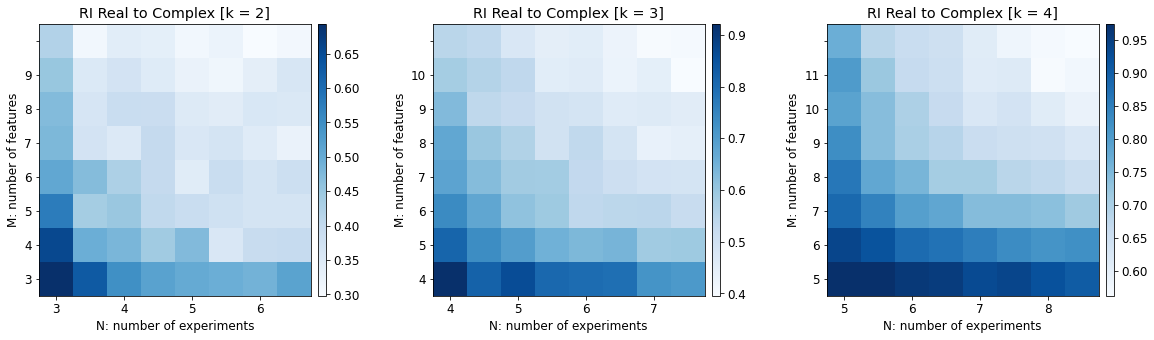

In [10]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
im = []
im.append(ax[0].imshow(ri2, cmap='Blues', vmin=np.min(ri2), vmax=np.max(ri2), origin='lower'))
im.append(ax[1].imshow(ri3, cmap='Blues', vmin=np.min(ri3), vmax=np.max(ri3), origin='lower'))
im.append(ax[2].imshow(ri4, cmap='Blues', vmin=np.min(ri4), vmax=np.max(ri4), origin='lower'))

for i in range(3):
    xtk = 2+i+np.arange(0,8)
    ax[i].set_xticklabels(xtk)
    ax[i].set_yticklabels(xtk);
    ax[i].set_title('RI Real to Complex [k = {}]'.format(2+i))
    ax[i].set_ylabel('M: number of features')
    ax[i].set_xlabel('N: number of experiments');
    div = make_axes_locatable(ax[i])
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(im[i], cax=cax);

np.mean(ri2), np.mean(ri3), np.mean(ri4)

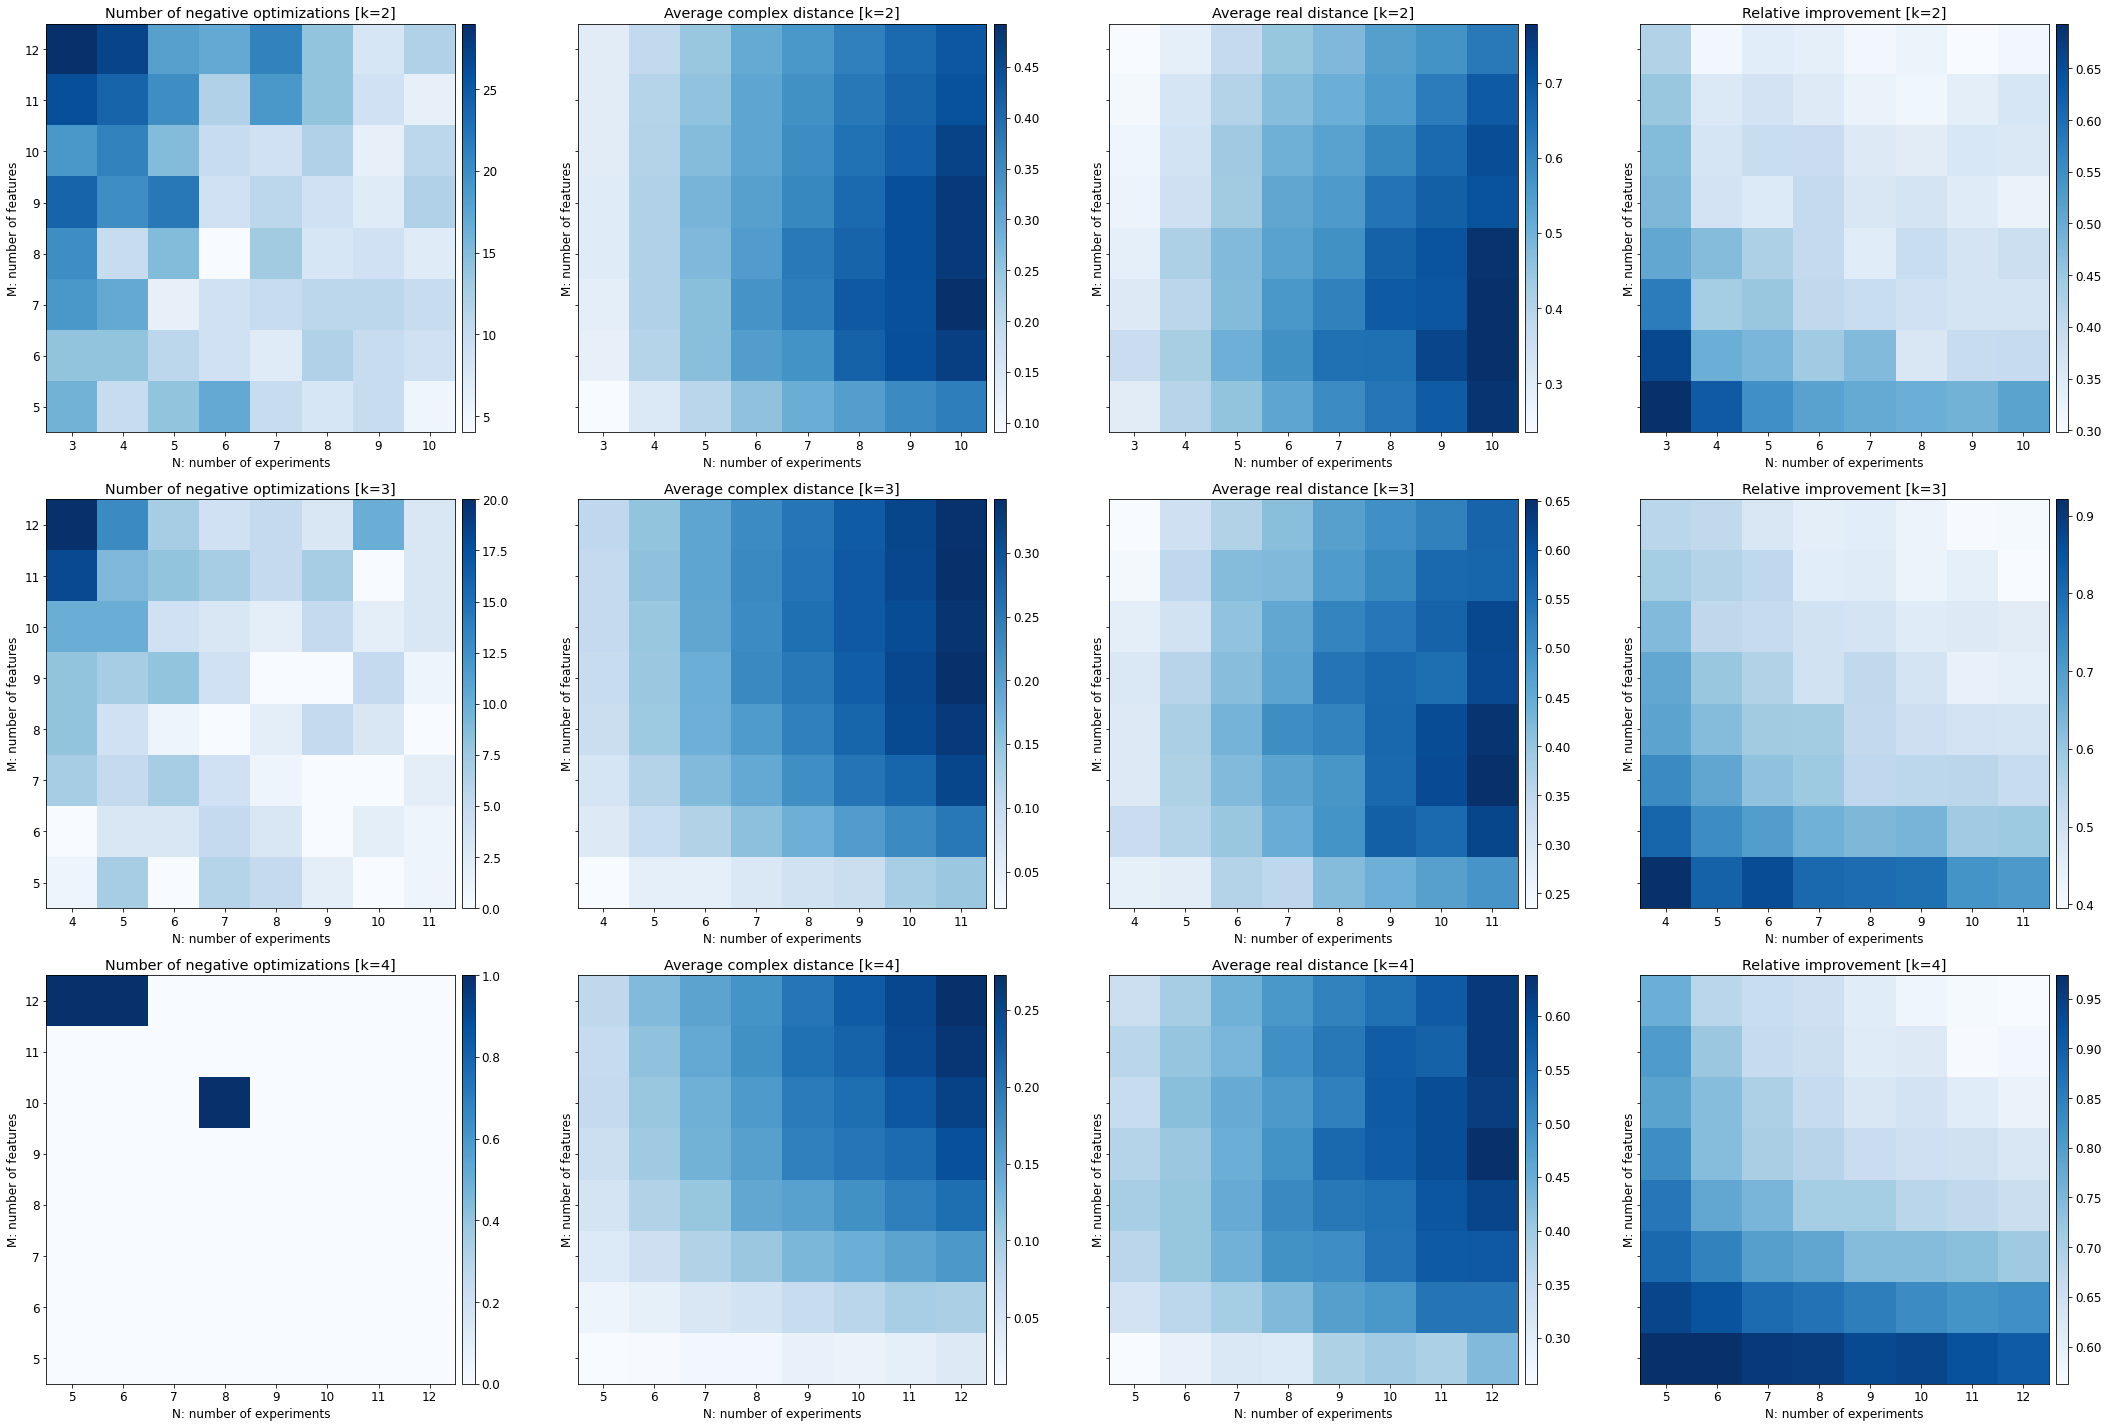

In [11]:
fig, ax = plt.subplots(3,4,figsize=(30,20),sharey=True)

im0 = ax[0, 0].imshow(neg2, cmap='Blues', vmin=np.min(neg2), vmax=np.max(neg2), origin='lower')
ax[0, 0].set_title('Number of negative optimizations [k=2]')
im1 = ax[0, 1].imshow(avs2, cmap='Blues', vmin=np.min(avs2), vmax=np.max(avs2), origin='lower')
ax[0, 1].set_title('Average complex distance [k=2]')
im2 = ax[0, 2].imshow(avf2, cmap='Blues', vmin=np.min(avf2), vmax=np.max(avf2), origin='lower')
ax[0, 2].set_title('Average real distance [k=2]')
im3 = ax[0, 3].imshow(ri2, cmap='Blues', vmin=np.min(ri2), vmax=np.max(ri2), origin='lower')
ax[0, 3].set_title('Relative improvement [k=2]')

im4 = ax[1, 0].imshow(neg3, cmap='Blues', vmin=np.min(neg3), vmax=np.max(neg3), origin='lower')
ax[1, 0].set_title('Number of negative optimizations [k=3]')
im5 = ax[1, 1].imshow(avs3, cmap='Blues', vmin=np.min(avs3), vmax=np.max(avs3), origin='lower')
ax[1, 1].set_title('Average complex distance [k=3]')
im6 = ax[1, 2].imshow(avf3, cmap='Blues', vmin=np.min(avf3), vmax=np.max(avf3), origin='lower')
ax[1, 2].set_title('Average real distance [k=3]')
im7 = ax[1, 3].imshow(ri3, cmap='Blues', vmin=np.min(ri3), vmax=np.max(ri3), origin='lower')
ax[1, 3].set_title('Relative improvement [k=3]')

im8 = ax[2, 0].imshow(neg4, cmap='Blues', vmin=np.min(neg4), vmax=np.max(neg4), origin='lower')
ax[2, 0].set_title('Number of negative optimizations [k=4]')
im9 = ax[2, 1].imshow(avs4, cmap='Blues', vmin=np.min(avs4), vmax=np.max(avs4), origin='lower')
ax[2, 1].set_title('Average complex distance [k=4]')
im10 = ax[2, 2].imshow(avf4, cmap='Blues', vmin=np.min(avf4), vmax=np.max(avf4), origin='lower')
ax[2, 2].set_title('Average real distance [k=4]')
im11 = ax[2, 3].imshow(ri4, cmap='Blues', vmin=np.min(ri4), vmax=np.max(ri4), origin='lower')
ax[2, 3].set_title('Relative improvement [k=4]')

iml = [im0,im1,im2,im3,im4,im5,im6,im7,im8,im9,im10,im11]


for j in range(3):
    for i in range(4):
        xtk = 3+j+np.arange(0,8)
        a = ax[j, i]
        a.set_ylabel('M: number of features')
        a.set_xticks(np.arange(0,8))
        a.set_yticks(np.arange(0,8))
        a.set_xticklabels(xtk)
        a.set_yticklabels(xtk);
        a.set_xlabel('N: number of experiments')
        div = make_axes_locatable(a)
        cax = div.append_axes("right", size="3%", pad=0.1)
        plt.colorbar(iml[i+4*j], cax=cax);
    
fig.tight_layout()

In [12]:
fig.savefig('figures/all-vr-RIrealvscomplex-all.jpg', dpi=150)

'\nax[0,0].set_ylabel(\'N\')\nax[1,0].plot(tk, np.mean(ri2, axis=1), color = \'k\', lw=3)\nax[1,1].plot(tk+1, np.mean(ri3, axis=1), color = \'k\', lw=3)\nax[1,2].plot(tk+2, np.mean(ri4, axis=1), color = \'k\', lw=3)\n\n\n for i in range(3):\n    a = ax[1,i]\n    a.set_ylim(0,1)\n    a.set_xlabel(\'M\')\n    a.set_ylabel(\'RI\')\n    a.set_xticks(i+tk)\n    a.set_xticklabels(i+tk)\n    a.grid(axis=\'y\', ls=\'--\')\n    div = make_axes_locatable(a)\n    cax = div.append_axes("right", size="3%", pad=0.1)\n    cax.set_visible(0)\n\nplt.subplots_adjust(top=1.05, left=0.05, right=0.95, bottom=0.1, wspace=0.4, hspace=0.1) '

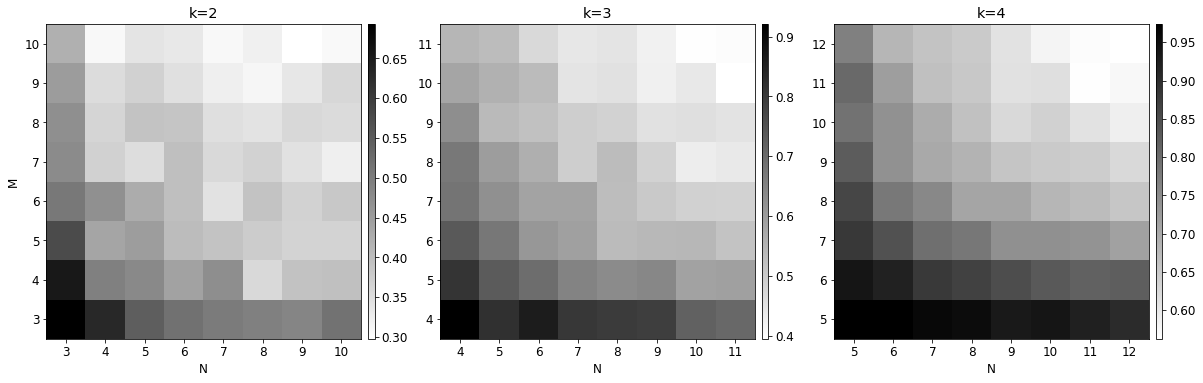

In [13]:
fig, ax = plt.subplots(1,3,figsize=(20,15))

im2 = ax[0].imshow(ri2, cmap='binary', vmin=np.min(ri2), vmax=np.max(ri2), origin='lower')
ax[0].set_title('k=2');
im3 = ax[1].imshow(ri3, cmap='binary', vmin=np.min(ri3), vmax=np.max(ri3), origin='lower')
ax[1].set_title('k=3');
im4 = ax[2].imshow(ri4, cmap='binary', vmin=np.min(ri4), vmax=np.max(ri4), origin='lower')
ax[2].set_title('k=4');

ax[0].set_ylabel('M')

iml = [im2,im3,im4]
tk = 3+np.arange(0,8)
for i in range(3):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(i+tk)
    a.set_yticklabels(i+tk);
    a.set_xlabel('N')
        
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="2%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);



'''
ax[0,0].set_ylabel('N')
ax[1,0].plot(tk, np.mean(ri2, axis=1), color = 'k', lw=3)
ax[1,1].plot(tk+1, np.mean(ri3, axis=1), color = 'k', lw=3)
ax[1,2].plot(tk+2, np.mean(ri4, axis=1), color = 'k', lw=3)


 for i in range(3):
    a = ax[1,i]
    a.set_ylim(0,1)
    a.set_xlabel('M')
    a.set_ylabel('RI')
    a.set_xticks(i+tk)
    a.set_xticklabels(i+tk)
    a.grid(axis='y', ls='--')
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    cax.set_visible(0)

plt.subplots_adjust(top=1.05, left=0.05, right=0.95, bottom=0.1, wspace=0.4, hspace=0.1) '''

In [14]:
fig.savefig('figures/all-vr-RIrealvscomplex.jpg', dpi=150)